In [1]:
## Imports

import glob
import os

import random

# Import local modules containing all functions
from helpers import *

In [2]:
## Load all sample files

filedir =  "/Volumes/External Storage/Thesis/Corpus/eng-balm-emmanuel/flac"  #"/Users/aaronkarp/Documents/Thesis/testSounds"
segment_length = 0.1  # length of segments in seconds

sounds, samplerates, names, unused_names = load_sounds(filedir, cut=70)
spectrograms, mfccs, rmss, centroids, max_num_segs = analyze_sounds(sounds, samplerates, segment_length)

num_files = len(sounds)

directory = '/Users/aaronkarp/Documents/Thesis/Code/savedData/'
to_save = [['samplerates', samplerates], ['spectrograms', spectrograms], ['mfccs', mfccs], ['rmss', rmss], ['centroids', centroids]]
save_data(to_save, directory)
save_names(names, unused_names, directory=directory)

Loading...
1%     2%     3%     4%     5%     6%     7%     8%     9%     10%     11%     12%     13%     14%     15%     16%     17%     18%     19%     20%     21%     22%     23%     24%     25%     26%     27%     28%     29%     30%     31%     32%     33%     34%     35%     36%     37%     38%     39%     40%     41%     42%     43%     44%     45%     46%     47%     48%     49%     50%     51%     52%     53%     54%     55%     56%     57%     58%     59%     60%     61%     62%     63%     64%     65%     66%     67%     68%     69%     70%     71%     72%     73%     74%     75%     76%     77%     78%     79%     80%     81%     82%     83%     84%     85%     86%     87%     88%     89%     90%     91%     92%     93%     94%     95%     96%     97%     98%     99%     100%     Finished Loading
Using 685 / 986 files ~= 0.6947261663286004%
Analyzing...
1%     2%     3%     4%     5%     6%     7%     8%     9%     10%     11%     12%     13%     14%     15%     16%     17%

In [3]:
## Organize features into lists of segments
# feature1 = [segment1 segment2 segment3]
# segment1 = nxm np.matrix 

spectrograms_by_seg_flat = segment_matrix(spectrograms, max_num_segs, num_files)
mfccs_by_seg_flat = segment_matrix(mfccs, max_num_segs, num_files)
centroids_by_seg_flat = segment_matrix(centroids, max_num_segs, num_files)

In [4]:
## Build/save LSHs for all features

spec_engines = []
mfcc_engines = []
centroid_engines = []
num_bits = 20 # How many bits to use for hashing

for seg in spectrograms_by_seg_flat:
    spec_engines.append(build_lsh(seg, num_bits))
for seg in mfccs_by_seg_flat:
    mfcc_engines.append(build_lsh(seg, num_bits))
for seg in centroids_by_seg_flat:
    centroid_engines.append(build_lsh(seg, num_bits))
    
reboot_directory()
save_engines(spec_engines, 'spectrogram')
save_engines(mfcc_engines, 'mfcc')
save_engines(centroid_engines, 'centroid')

Original query: eng-0127efe1.flac


Best guess: 451


Second best guess: 438


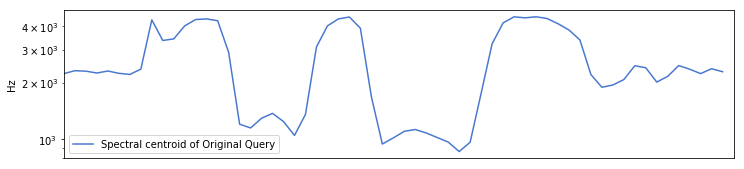

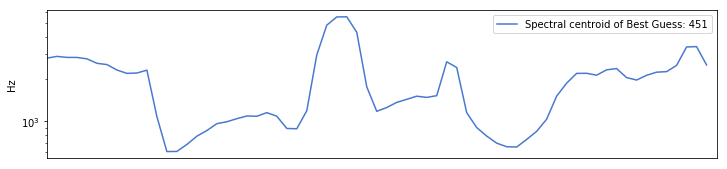

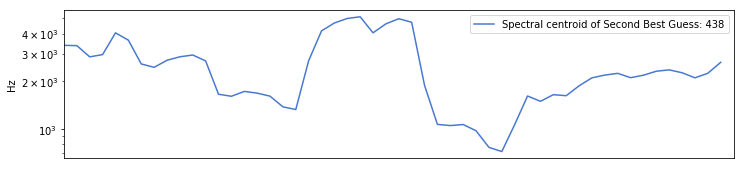

Guesses: 451 : 2.2770311130737575e-05
438 : 2.440373937917517e-05
544 : 2.844904742915766e-05
592 : 2.959533569513173e-05
160 : 3.433490256110616e-05
Original query: eng-0127efe1.flac


Best guess: 174


Second best guess: 523


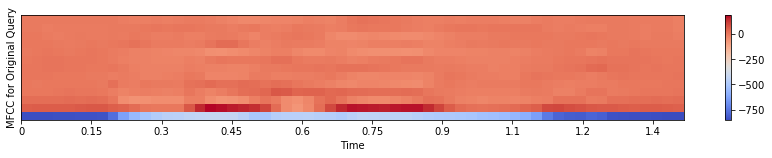

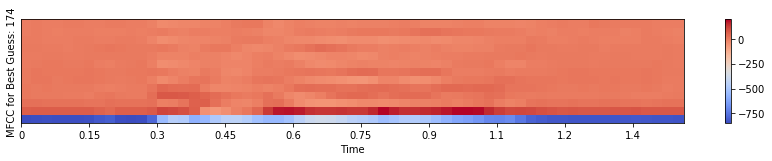

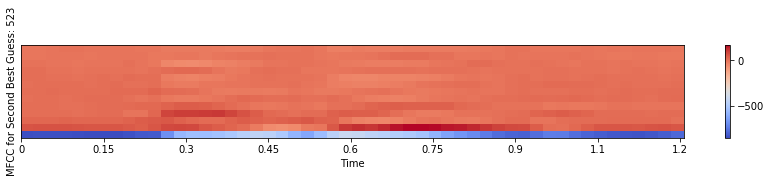

Guesses: 174 : 0.000886147506017787
523 : 0.0009168714402683076
92 : 0.0009510047134700939
632 : 0.0009742913853088009
47 : 0.000991227721951482
Original query: eng-0127efe1.flac


Best guess: 609


Second best guess: 530


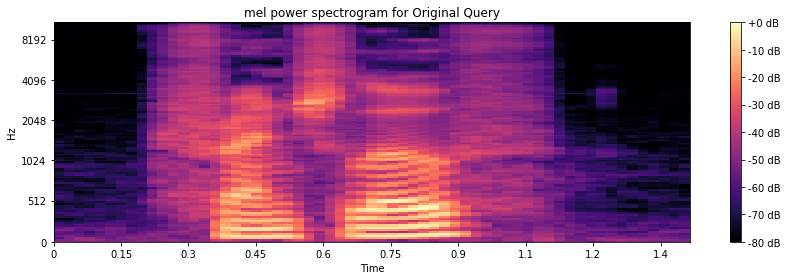

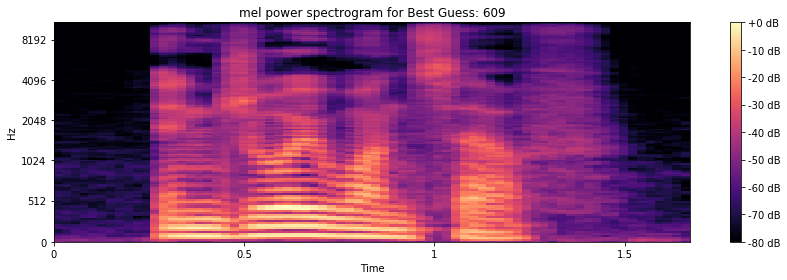

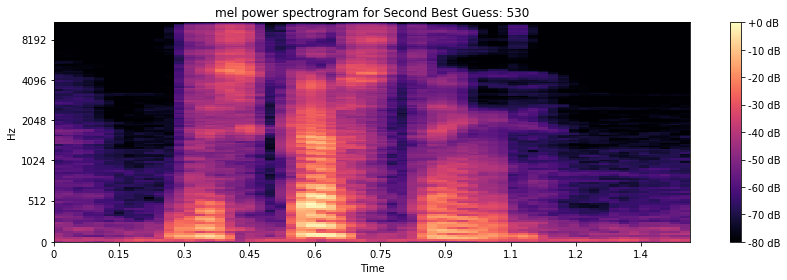

Guesses: 609 : 0.00657479172336306
530 : 0.006791435978364624
433 : 0.006873730590811533
454 : 0.007087804459559144
605 : 0.007136765193796246


Original Query: 



Best guesses: 
Sound #236 : 0.03310933606587152


Sound #395 : 0.041167759248105895


Sound #635 : 0.05710971193098502


Sound #560 : 0.06422542246699103


In [5]:
## Load engines and Query

# Load engines
spec_engines = load_engines('spectrogram')
mfcc_engines = load_engines('mfcc')
centroid_engines = load_engines('centroid')

# Load unused sounds and choose random one
f = open('/Users/aaronkarp/Documents/Thesis/Code/savedData/unsampledFiles.txt', "r")
unused_files = f.read().split('\n')
to_check = random.choice(unused_files)
os.chdir("/Volumes/External Storage/Thesis/Corpus/eng-balm-emmanuel/flac")  #("/Users/aaronkarp/Documents/Thesis/testSounds")

# Do the ANN distances

cum_distances = [0]*num_files  # The combined distance measures

guesses, distances = query_sound(to_check, centroid_engines, num_files, sounds, samplerates, segment_length = segment_length,
                                 display=True, match_type='centroid')
print("Guesses: ", end='')
for x in guesses[:5]:
    print(str(x) + " : " + str(distances[x]))
cum_distances = [sum(x) for x in zip(distances, cum_distances)]
      
guesses, distances = query_sound(to_check, mfcc_engines, num_files, sounds, samplerates, segment_length = segment_length,
                                 display=True, match_type='mfcc')
print("Guesses: ", end='')
for x in guesses[:5]:
    print(str(x) + " : " + str(distances[x]))
cum_distances = [sum(x) for x in zip(distances, cum_distances)]

guesses, distances = query_sound(to_check, spec_engines, num_files, sounds, samplerates, segment_length = segment_length,
                                 display=True, match_type='spectrogram')
print("Guesses: ", end='')
for x in guesses[:5]:
    print(str(x) + " : " + str(distances[x]))
cum_distances = [sum(x) for x in zip(distances, cum_distances)]

cum_guesses = sorted(range(len(cum_distances)), key=lambda k : cum_distances[k])

print("\n\nOriginal Query: ")
y,sr = librosa.load(to_check)
ipd.display(ipd.Audio(y, rate=sr)) # load matched file
print("\nBest guesses: ")
for i in range(0, 4):
    print("Sound #" + str(cum_guesses[i]) + " : " + str(cum_distances[cum_guesses[i]]))
    ipd.display(ipd.Audio(sounds[cum_guesses[i]], rate = samplerates[cum_guesses[i]])) # load matched file